1. [x]   Substituição de slide intermediário
2. [x]   Posicionamento das imagens e dos textos corrigidas
3. [x]   Adição de slides em branco caso o núro do slide adicionadao seja maior que o número de slides da apresentação

In [55]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from PIL import Image
import os

def get_img_dim(img, max_width, max_height):
    width, height = img.size
    ratio = min(max_width/width, max_height/height)
    return width*ratio, height*ratio

def add_slide(title, text1=None, text2=None, image1=None, image2=None, slide_number=1, font_name='Calibri', title_font_size=30, text_font_size=10,
              slide_margin=0.2, vertical_spacing=0.05, horizontal_spacing=0.05):
    if os.path.exists('presentation.pptx'):
        presentation = Presentation('presentation.pptx')
    else:
        presentation = Presentation()
        
    while len(presentation.slides) < slide_number:
        blank_slide_layout = presentation.slide_layouts[6]
        presentation.slides.add_slide(blank_slide_layout)

    if len(presentation.slides) >= slide_number:
        slide = presentation.slides[slide_number - 1]
    else:
        blank_slide_layout = presentation.slide_layouts[6]
        slide = presentation.slides.add_slide(blank_slide_layout)

    for shape in slide.shapes:
        sp = shape
        slide.shapes._spTree.remove(sp._element)

    margin = Inches(slide_margin)
    v_space = Inches(vertical_spacing)
    h_space = Inches(horizontal_spacing)

    quadrant_width = (presentation.slide_width - 2 * margin - h_space) / 2
    quadrant_height = (presentation.slide_height * 0.85 - 2 * margin - v_space) / 2

    # Adicione o título
    title_box = slide.shapes.add_textbox(margin, margin, presentation.slide_width - 2 * margin, presentation.slide_height * 0.1)
    title_frame = title_box.text_frame
    title_frame.text = title
    title_frame.paragraphs[0].alignment = PP_ALIGN.LEFT
    title_frame.paragraphs[0].runs[0].font.name = font_name
    title_frame.paragraphs[0].runs[0].font.size = Pt(title_font_size)

    # Adicione o texto1 (no quadrante superior esquerdo)
    if text1:
        text1_box = slide.shapes.add_textbox(margin, presentation.slide_height * 0.15 + margin, quadrant_width, quadrant_height)
        text1_frame = text1_box.text_frame
        text1_frame.text = text1
        text1_frame.paragraphs[0].alignment = PP_ALIGN.JUSTIFY
        for paragraph in text1_frame.paragraphs:
            for run in paragraph.runs:
                run.font.name = font_name
                run.font.size = Pt(text_font_size)

    # Adicione o texto2 (no quadrante inferior direito)
    if text2:
        text2_box = slide.shapes.add_textbox(margin + quadrant_width + h_space, margin + presentation.slide_height * 0.15 + quadrant_height + v_space, quadrant_width, quadrant_height)
        text2_frame = text2_box.text_frame
        text2_frame.text = text2
        text2_frame.paragraphs[0].alignment = PP_ALIGN.JUSTIFY
        for paragraph in text2_frame.paragraphs:
            for run in paragraph.runs:
                run.font.name = font_name
                run.font.size = Pt(text_font_size)

    # Adicione a imagem1 (no quadrante superior direito)
    if image1:
        img1 = Image.open(image1)
        img1_width, img1_height = get_img_dim(img1, quadrant_width, quadrant_height)
        slide.shapes.add_picture(image1, margin + quadrant_width + h_space, presentation.slide_height * 0.15 + margin, img1_width, img1_height)

    # Adicione a imagem2 (no quadrante inferior esquerdo)
    if image2:
        img2 = Image.open(image2)
        img2_width, img2_height = get_img_dim(img2, quadrant_width, quadrant_height)
        slide.shapes.add_picture(image2, margin, presentation.slide_height * 0.15 + margin + quadrant_height + v_space, img2_width, img2_height)

    presentation.save('presentation.pptx')


In [56]:
import matplotlib.pyplot as plt
import numpy as np

def create_plot1():
    # Crie alguns dados para o gráfico
    x = np.linspace(0, 10, 100)
    y = np.sin(x)

    # Crie o gráfico
    plt.figure(figsize=(6,4))
    plt.plot(x, y, '-')
    plt.title('Gráfico de Seno')
    plt.xlabel('x')
    plt.ylabel('sin(x)')

    # Salve o gráfico como uma imagem
    plt.savefig('image1.png')

def create_plot2():
    # Crie alguns dados para o gráfico
    x = np.linspace(0, 10, 100)
    y = np.cos(x)

    # Crie o gráfico
    plt.figure(figsize=(6,4))
    plt.plot(x, y, '-')
    plt.title('Gráfico de Cosseno')
    plt.xlabel('x')
    plt.ylabel('cos(x)')

    # Salve o gráfico como uma imagem
    plt.savefig('image2.png')


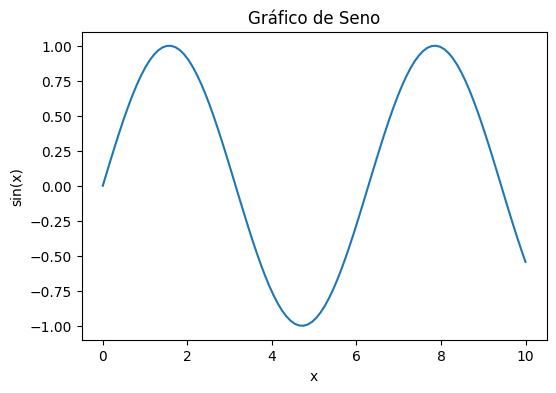

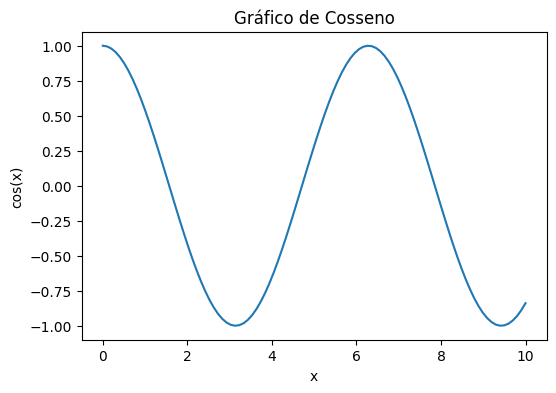

In [57]:
# Gere os gráficos
create_plot1()
create_plot2()

# Gere o texto lorem ipsum
title = "Título de exemplo par ao slide"
text1 = "slide 28 Proxima Nova simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. "
text2 = "Atualização do slide 20 :) --- the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. "

# Caminhos para as imagens
image1 = 'image1.png'
image2 = 'image2.png'

# Adicionar um slide à apresentação
add_slide(title, None, text2, None, image2, slide_number = 28, font_name='Proxima Nova', title_font_size=30, text_font_size=10,
              slide_margin=0.2, vertical_spacing=0.05, horizontal_spacing=0.05)
